In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from matplotlib.colors import ListedColormap
from scipy.spatial import distance 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

In [86]:
# read data
data = pd.read_csv('diabetes.csv')

# check data description
print(data.shape)
data.describe()

(769, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,3.840052,120.897269,69.115735,20.509753,79.697009,31.998179,0.471590,33.269181,0.349805
std,3.370237,31.951886,19.345296,15.959020,115.203999,7.880557,0.331208,11.778737,0.477219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.000000,36.600000,0.626000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [87]:
np.random.seed(42)

# split x and y
x = data.drop(columns = ['Outcome'])
y = data['Outcome']

# split data into testing and trining sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)

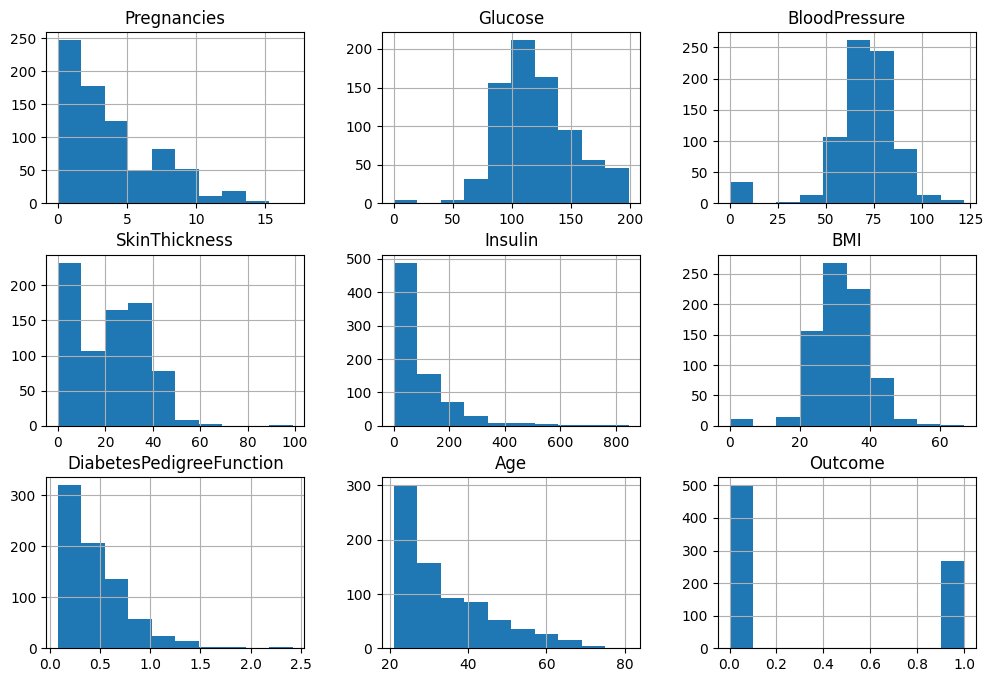

In [88]:
# evaluate data set
# histogram/density plot
data.hist(figsize=(12, 8))
plt.show()

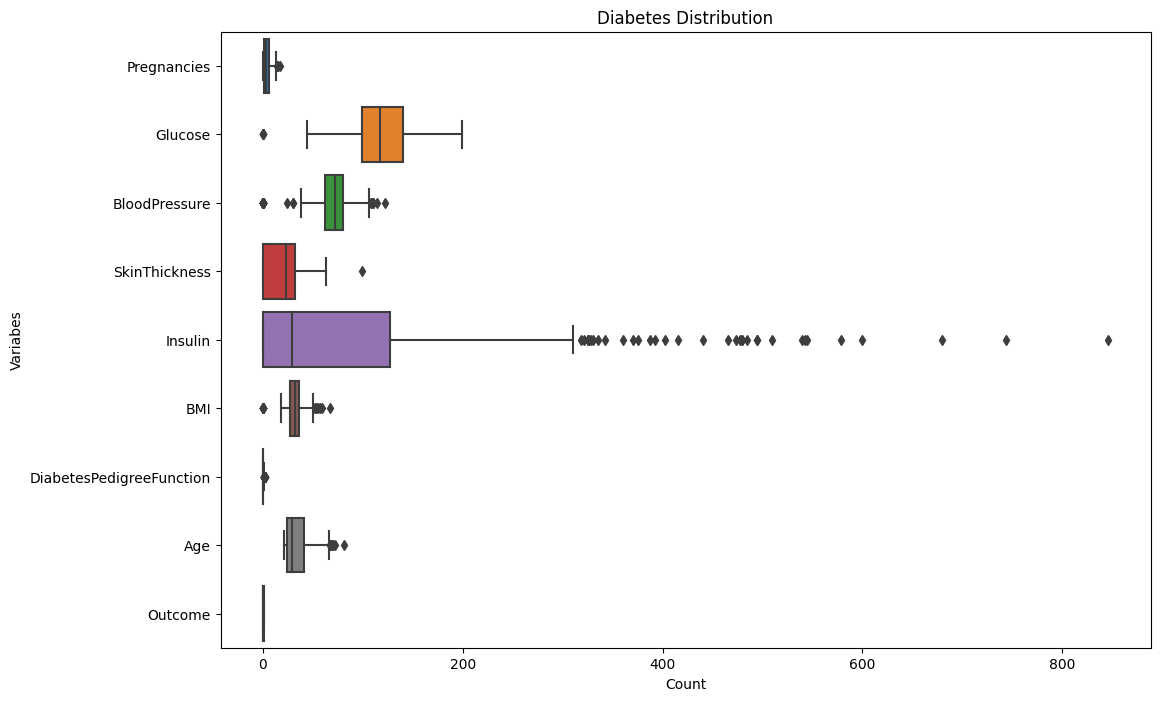

In [89]:
# check for outliers
# side by side boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient="h")
plt.title('Diabetes Distribution')
plt.xlabel('Count')
plt.ylabel('Variabes')
plt.show()

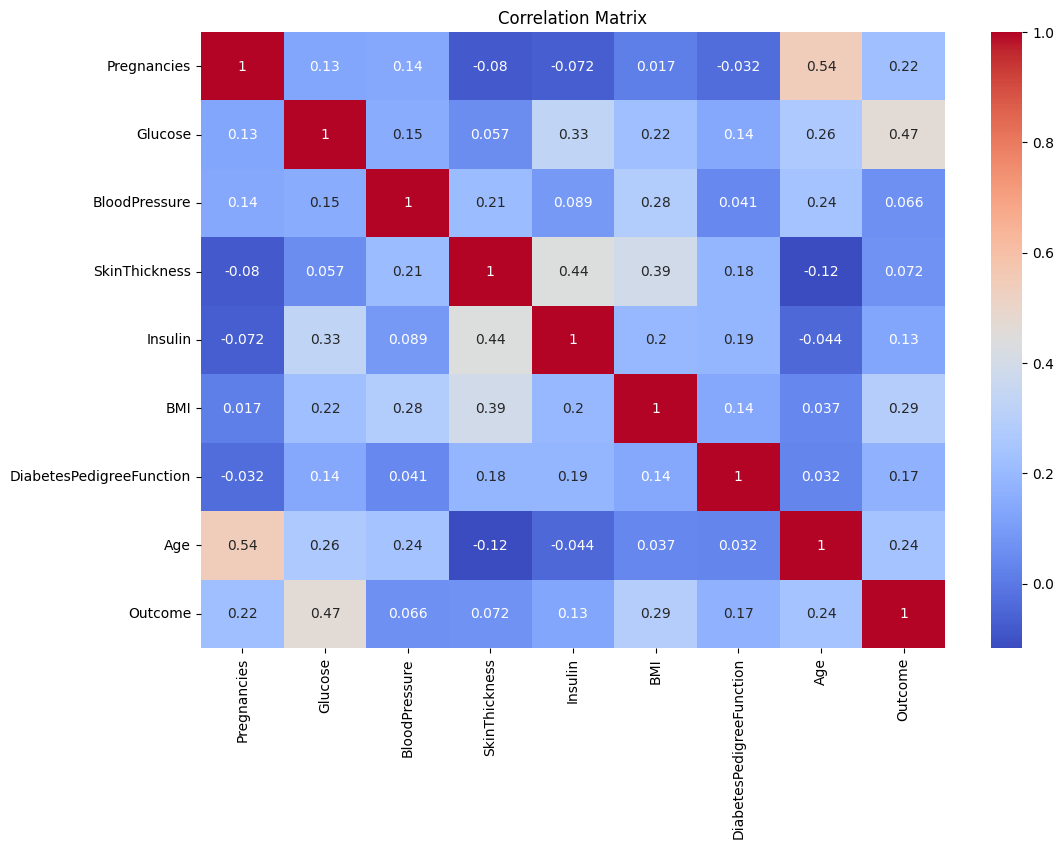

In [90]:
correlation_matrix = data.corr()
plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix , annot=True , cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [91]:
# select features

estimator = SVR(kernel = 'linear')

# cross validated 2 times using RFECV
selector = RFECV(estimator, step = 1, cv = 2)
selector = selector.fit(x, y)
print(selector.support_)
print(selector.ranking_)

[ True  True  True False False  True  True  True]
[1 1 1 2 3 1 1 1]


In [92]:
# cross validated 3 times using RFECV
selector = RFECV(estimator, step = 1, cv = 3)
selector = selector.fit(x, y)
print(selector.support_)
print(selector.ranking_)

[ True  True False False False  True  True False]
[1 1 2 4 5 1 1 3]


c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


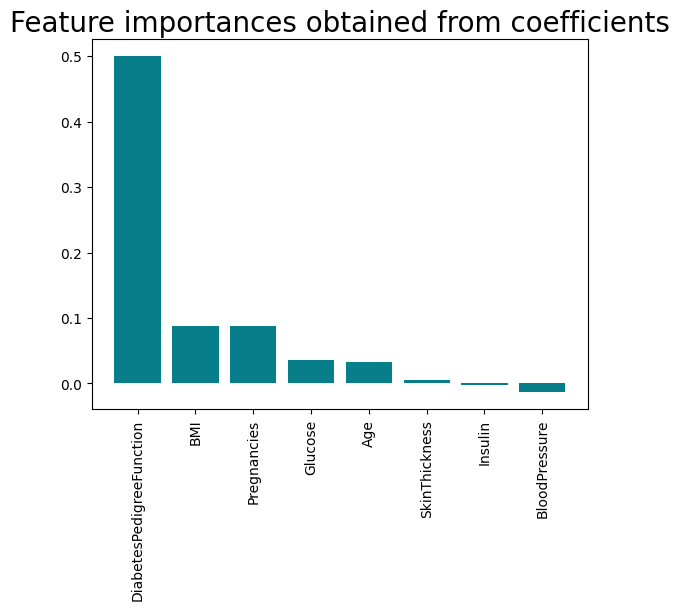

In [93]:
# Obtain importances from coefficients using log regression
model = LogisticRegression()
model.fit(x_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

The selected Features using Recursive Feature Elemination and feature importance method are 'Pregnancies', 'Glucose', 'BMI', and 'DiabetesPedigreeFunction(which indicates the likelihood of diabetes based on the subject's age and his/her diabetic family history)'. We have also decided to include 'Age', as its importance is similar to that of 'Glucose'.

In [94]:
# create new x_test and x_train sets with selected featrues 
x_train_selected = x_train.drop(columns = ['SkinThickness', 'Insulin', 'BloodPressure'])

x_test_selected = x_test.drop(columns = ['SkinThickness', 'Insulin', 'BloodPressure'])

total: 193  correct: 130  accuracy: 0.67
total: 193  correct: 136  accuracy: 0.70
total: 193  correct: 139  accuracy: 0.72
total: 193  correct: 139  accuracy: 0.72
total: 193  correct: 139  accuracy: 0.72
total: 193  correct: 134  accuracy: 0.69
total: 193  correct: 138  accuracy: 0.72
total: 193  correct: 134  accuracy: 0.69


total: 193  correct: 138  accuracy: 0.72
total: 193  correct: 136  accuracy: 0.70
total: 193  correct: 137  accuracy: 0.71
total: 193  correct: 138  accuracy: 0.72
total: 193  correct: 140  accuracy: 0.73
total: 193  correct: 138  accuracy: 0.72
total: 193  correct: 137  accuracy: 0.71


Text(0, 0.5, 'Testing Accuracy')

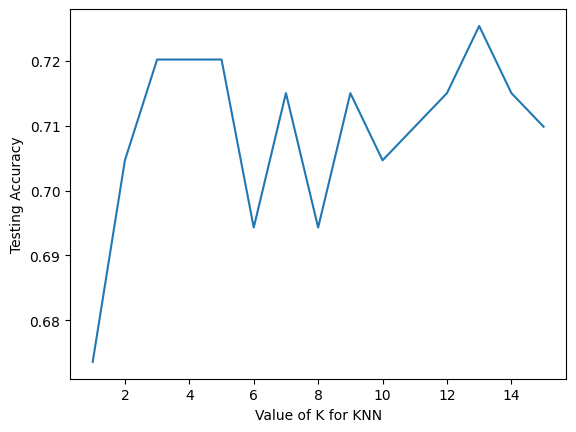

In [95]:
# fit KNN function to build the model
result = []
for k in range(1,16):
    ##use sklearn knn function
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(x_train_selected, y_train)
    preds = clf.predict(x_test_selected)
    correct, total = 0, 0
    for pred, outcome in zip(preds, y_test):
        if pred == outcome: correct += 1
        total += 1
    print ('total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total))
    result.append(1.0*correct/total)
##plot the result
plt.plot(range(1,16),result)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

total: 193  correct: 122  accuracy: 0.63
total: 193  correct: 133  accuracy: 0.69
total: 193  correct: 125  accuracy: 0.65
total: 193  correct: 135  accuracy: 0.70
total: 193  correct: 134  accuracy: 0.69
total: 193  correct: 136  accuracy: 0.70
total: 193  correct: 135  accuracy: 0.70
total: 193  correct: 135  accuracy: 0.70
total: 193  correct: 136  accuracy: 0.70
total: 193  correct: 137  accuracy: 0.71
total: 193  correct: 137  accuracy: 0.71
total: 193  correct: 140  accuracy: 0.73
total: 193  correct: 144  accuracy: 0.75
total: 193  correct: 143  accuracy: 0.74
total: 193  correct: 139  accuracy: 0.72


Text(0, 0.5, 'Testing Accuracy')

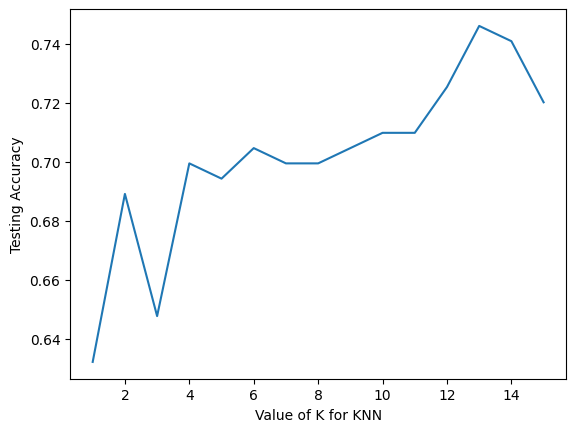

In [96]:
# compare the model accuracy using all features
result = []
for k in range(1,16):
    ##use sklearn knn function
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(x_train, y_train)
    preds = clf.predict(x_test)
    correct, total = 0, 0
    for pred, outcome in zip(preds, y_test):
        if pred == outcome: correct += 1
        total += 1
    print ('total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total))
    result.append(1.0*correct/total)
##plot the result
plt.plot(range(1,16),result)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

In [97]:
# remove outliers 
outlier_threshold = x_train['Insulin'].mean() + (x_train['Insulin'].std()*2)

# create subsets
x_train_no_outliers = x_train[x_train['Insulin'] <= outlier_threshold ] 
y_train_no_outliers = y_train[x_train['Insulin'] <= outlier_threshold ]

x_test_no_outliers = x_test[x_test['Insulin'] <= outlier_threshold ] 
y_test_no_outliers = y_test[x_test['Insulin'] <= outlier_threshold ]

total: 180  correct: 115  accuracy: 0.64
total: 180  correct: 126  accuracy: 0.70
total: 180  correct: 120  accuracy: 0.67
total: 180  correct: 128  accuracy: 0.71
total: 180  correct: 128  accuracy: 0.71
total: 180  correct: 128  accuracy: 0.71
total: 180  correct: 129  accuracy: 0.72
total: 180  correct: 129  accuracy: 0.72
total: 180  correct: 129  accuracy: 0.72
total: 180  correct: 131  accuracy: 0.73
total: 180  correct: 131  accuracy: 0.73
total: 180  correct: 134  accuracy: 0.74
total: 180  correct: 138  accuracy: 0.77
total: 180  correct: 136  accuracy: 0.76
total: 180  correct: 133  accuracy: 0.74


Text(0.5, 1.0, 'Model performance without outliers')

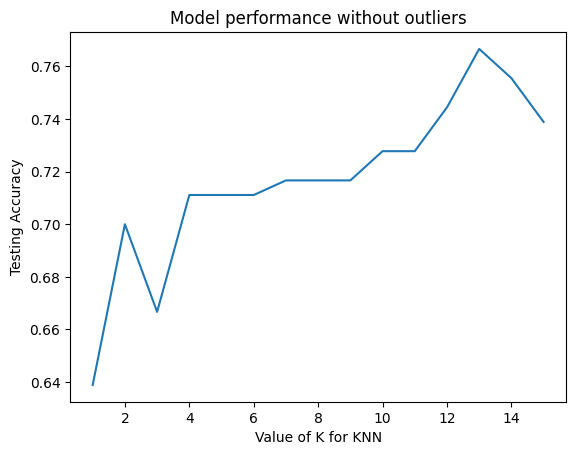

In [98]:
# compare the model accuracy using all features
result = []
for k in range(1,16):
    ##use sklearn knn function
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(x_train_no_outliers, y_train_no_outliers)
    preds = clf.predict(x_test_no_outliers)
    correct, total = 0, 0
    for pred, outcome in zip(preds, y_test_no_outliers):
        if pred == outcome: correct += 1
        total += 1
    print ('total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total))
    result.append(1.0*correct/total)
##plot the result
plt.plot(range(1,16),result)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")
plt.title('Model performance without outliers')

In [99]:
# find the best k
max = np.max(result)
first_best_k = result.index(max) + 1
if first_best_k % 2 == 0:
    first_best_k = first_best_k + 1
print("\nThe best k value is: ",  first_best_k)


The best k value is:  13


We have observed that including all features leads to better accuracy using KNN method. As a result, we have decided to include all features for our final model.

In [100]:
# create Confusion Matrix with the best KNN model.
clf = neighbors.KNeighborsClassifier(first_best_k)
clf.fit(x_train_no_outliers, y_train_no_outliers)
preds = clf.predict(x_test_no_outliers)

result = confusion_matrix(y_test_no_outliers, preds)
print('Confusion Matrix:\n', result, '\n')

result1 = classification_report(y_test_no_outliers, preds)
print('Classification Report:',result1)

result2 = accuracy_score(y_test_no_outliers, preds)
print('Accuracy:', result2)

Confusion Matrix:
 [[103  15]
 [ 27  35]] 

Classification Report:               precision    recall  f1-score   support

           0       0.79      0.87      0.83       118
           1       0.70      0.56      0.62        62

    accuracy                           0.77       180
   macro avg       0.75      0.72      0.73       180
weighted avg       0.76      0.77      0.76       180

Accuracy: 0.7666666666666667


Decision Trees Analysis

In [101]:
# create Confusion Matrix for the Decition Trees model.
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train_no_outliers, y_train_no_outliers)
dt_pred = dt_model.predict(x_test_no_outliers)

result = confusion_matrix(y_test_no_outliers, dt_pred)
print('Confusion Matrix:\n', result, '\n')

result1 = classification_report(y_test_no_outliers, dt_pred)
print('Classification Report:\n',result1)

result2 = accuracy_score(y_test_no_outliers, dt_pred)
print('Decision Tree Accuracy:', result2)

Confusion Matrix:
 [[74 44]
 [16 46]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.63      0.71       118
           1       0.51      0.74      0.61        62

    accuracy                           0.67       180
   macro avg       0.67      0.68      0.66       180
weighted avg       0.72      0.67      0.67       180

Decision Tree Accuracy: 0.6666666666666666


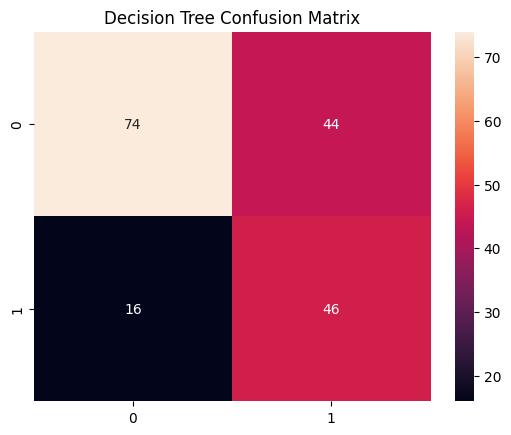

In [102]:
# confusion matrix visualization for Decision Trees
dt_cm = confusion_matrix(y_test_no_outliers, dt_pred)
sns.heatmap(dt_cm, annot=True, fmt='d')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [103]:
# feature selection to compare the accuracy for Decision Trees
rfe_dt = RFE(estimator = dt_model, n_features_to_select=5)
rfe_dt.fit(x_train_no_outliers, y_train_no_outliers)
X_train_dt_selected = rfe_dt.transform(x_train_no_outliers)
X_test_dt_selected = rfe_dt.transform(x_test_no_outliers)

In [104]:
# Train and evaluate the Decision Tree model with selected features
dt_model.fit(X_train_dt_selected, y_train_no_outliers)
dt_pred = dt_model.predict(X_test_dt_selected)

result = confusion_matrix(y_test_no_outliers, dt_pred)
print('Confusion Matrix:\n', result, '\n')

result1 = classification_report(y_test_no_outliers, dt_pred)
print('Classification Report:\n',result1)

result2 = accuracy_score(y_test_no_outliers, dt_pred)
print('Decision Tree Accuracy:', result2)

Confusion Matrix:
 [[80 38]
 [18 44]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.68      0.74       118
           1       0.54      0.71      0.61        62

    accuracy                           0.69       180
   macro avg       0.68      0.69      0.68       180
weighted avg       0.72      0.69      0.70       180

Decision Tree Accuracy: 0.6888888888888889


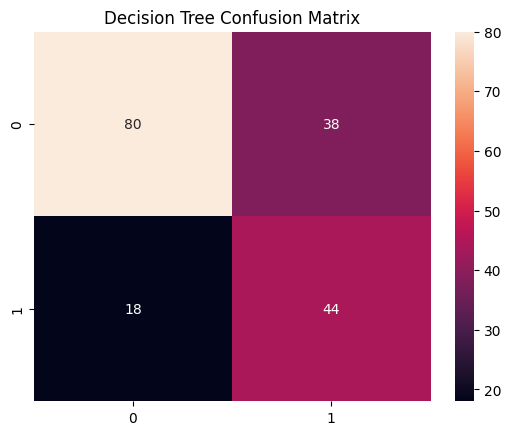

In [105]:
# confusion matrix visualization for Decision Trees
dt_cm = confusion_matrix(y_test_no_outliers, dt_pred)
sns.heatmap(dt_cm, annot=True, fmt='d')
plt.title('Decision Tree Confusion Matrix')
plt.show()